# LANL Earthquake prediction

2019/04/10

This is the very beginning of the challenge for LANL Earthquake prediction.
While downloading first look into data addtional information

![](./Capture1.JPG)

So data should be a mix of some periodic and aperiodic signals.

From the data description
### Data fields
acoustic_data - the seismic signal [int16]<br>
time_to_failure - the time (in seconds) until the next laboratory earthquake [float64]<br>
seg_id - the test segment ids for which predictions should be made (one prediction per segment)<br>
<br>
So it is one dimensional int16 input and continous output to predict.
Looks like a simple regression problem, just one dimensional, but from other source we know it is not that simple.

### Look into discussions

From host there is a introdution thread:
https://www.kaggle.com/c/LANL-Earthquake-Prediction/discussion/77525#latest-500808

They listed three papers of their research, which dealt with tha same data for this competition.
In their first paper: https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1002/2017GL074677

From their abstract:
>  These predictions are based __solely on the instantaneous physical characteristics of the acousticalsignal and do not make use of its history__. Surprisingly, machine learning identifies a signal emitted from thefault zone previously thought to be low-amplitude noise that enables failure forecasting throughout thelaboratory quake cycle. We infer that this signal originates from continuous grain motions of the fault gougeas the fault blocks displace.

Their method:
![](./Capture3.JPG)

So they use a 1000-trees Random Forrest to predict the experimental failure.

2019/04/16

I was super busy and no time to process the data...From today I want to use more complicated library to process the data.
From the thread: https://www.kaggle.com/allunia/shaking-earth
We know that for this dataset training data is quite different from test data, as below.

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import xgboost as xgb

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train1 = pd.read_csv('train.csv', nrows=100000000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

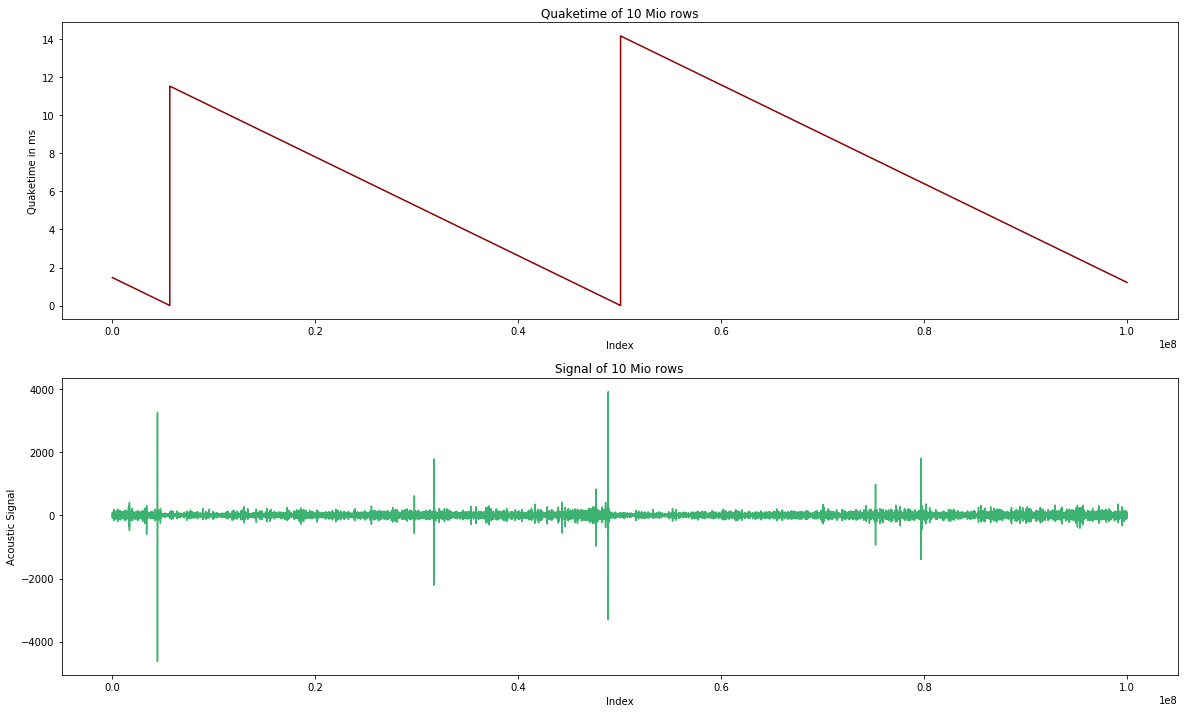

In [14]:
def plot_train_data_seg(dataset):
    ax[0].plot(dataset.index.values, dataset.time_to_failure.values, c="darkred")
    ax[0].set_title("Quaketime of 10 Mio rows")
    ax[0].set_xlabel("Index")
    ax[0].set_ylabel("Quaketime in ms");
    ax[1].plot(dataset.index.values, dataset.acoustic_data.values, c="mediumseagreen")
    ax[1].set_title("Signal of 10 Mio rows")
    ax[1].set_xlabel("Index")
    ax[1].set_ylabel("Acoustic Signal");
    
fig, ax = plt.subplots(1,1, figsize=(20,12))
plot_train_data_seg(train1)

#### We can see that experimental failure happened soon after the acoustic peak.
Also the peak will reach over -3000~3000

In [13]:
test1 = pd.read_csv('test\seg_00a37e.csv', nrows=10000000, dtype={'acoustic_data': np.int16})
test2 = pd.read_csv('test\seg_00be11.csv', nrows=10000000, dtype={'acoustic_data': np.int16})
test3 = pd.read_csv('test\seg_00c35b.csv', nrows=10000000, dtype={'acoustic_data': np.int16})
test4 = pd.read_csv('test\seg_00cc91.csv', nrows=10000000, dtype={'acoustic_data': np.int16})
test5 = pd.read_csv('test\seg_00e5f7.csv', nrows=10000000, dtype={'acoustic_data': np.int16})
test6 = pd.read_csv('test\seg_00f3b9.csv', nrows=10000000, dtype={'acoustic_data': np.int16})

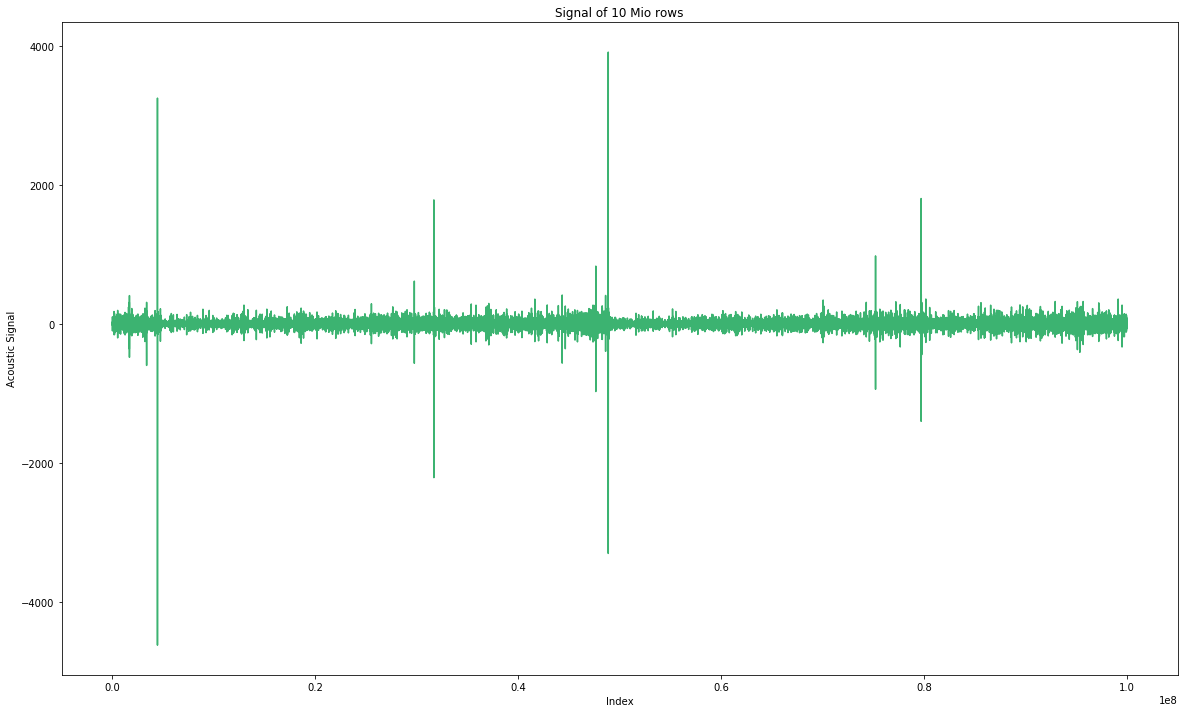

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(20,12))

def plot_data_seg(dataset):
    ax.plot(dataset.index.values, dataset.acoustic_data.values, c="mediumseagreen")
    ax.set_title("Signal of 10 Mio rows")
    ax.set_xlabel("Index")
    ax.set_ylabel("Acoustic Signal");

plot_data_seg(train1)

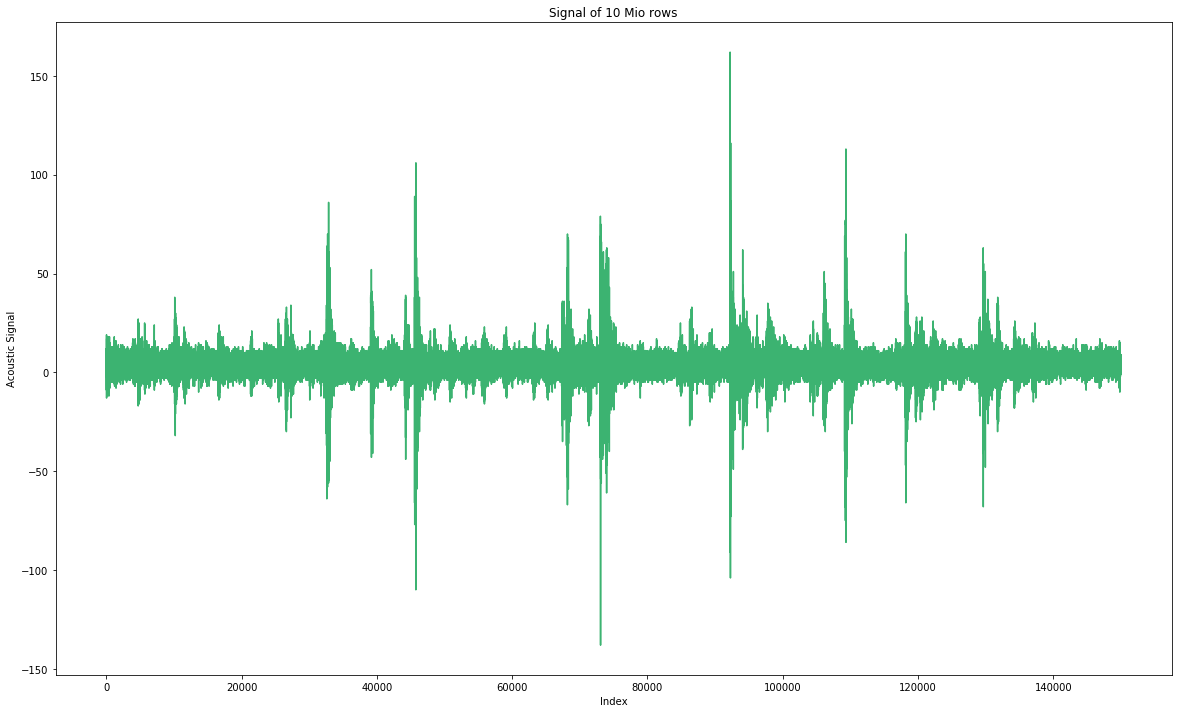

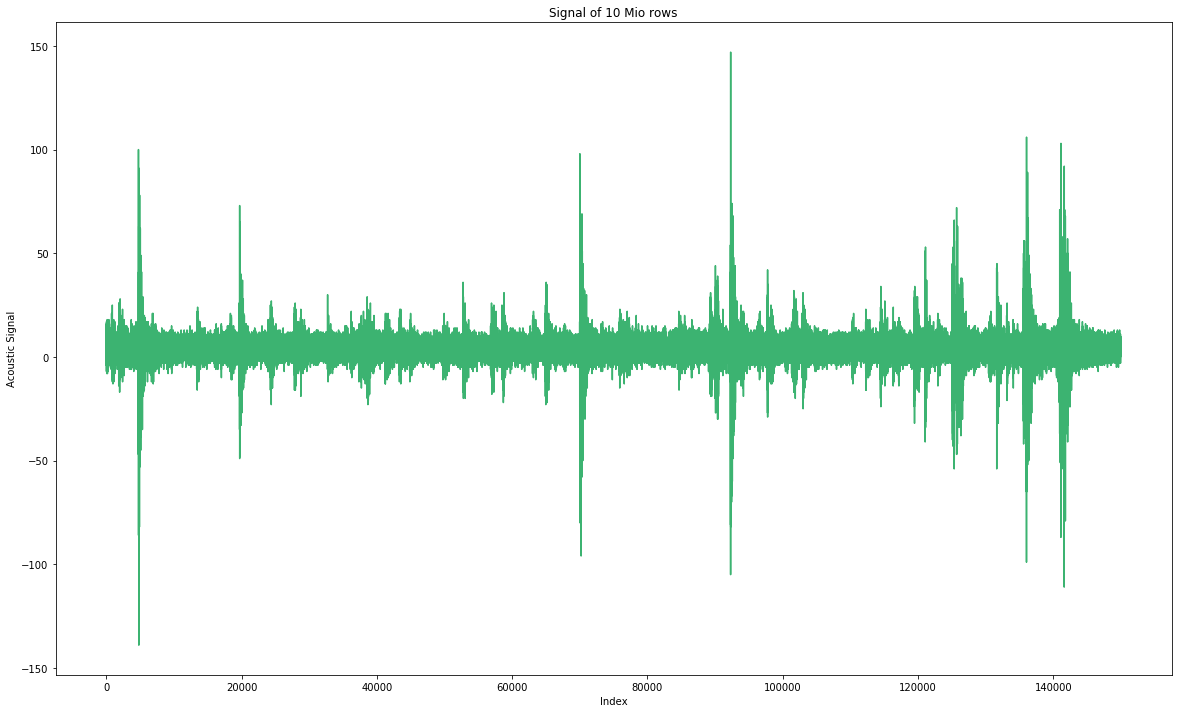

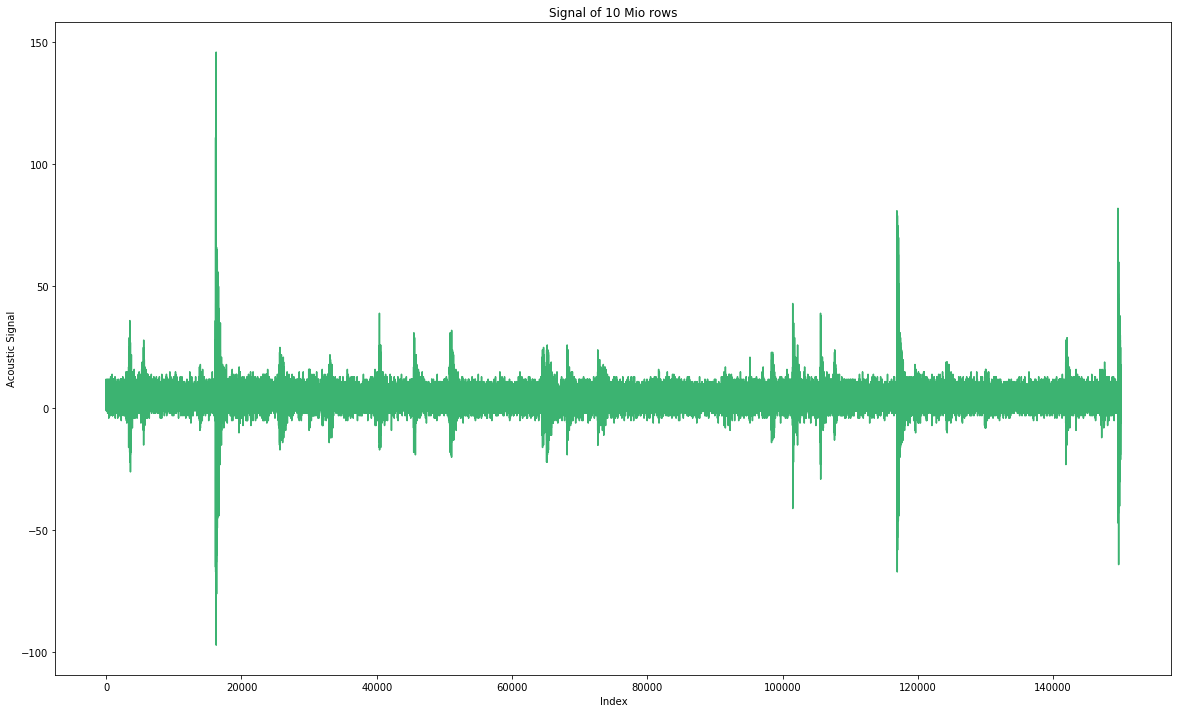

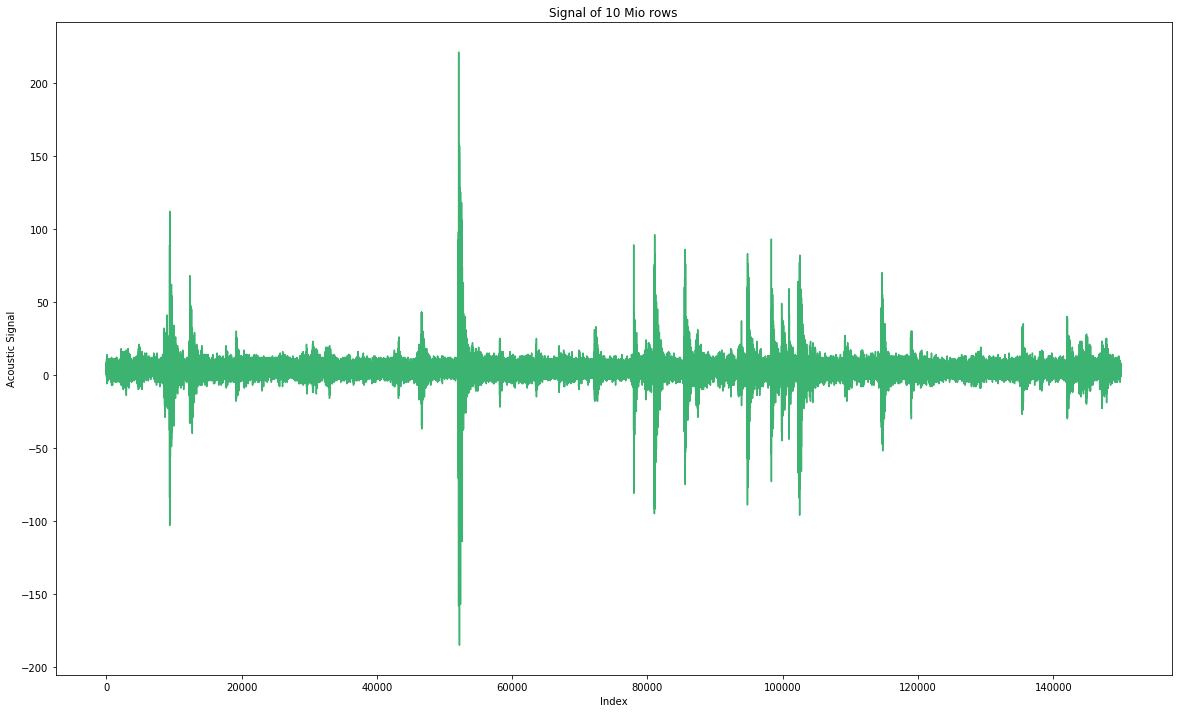

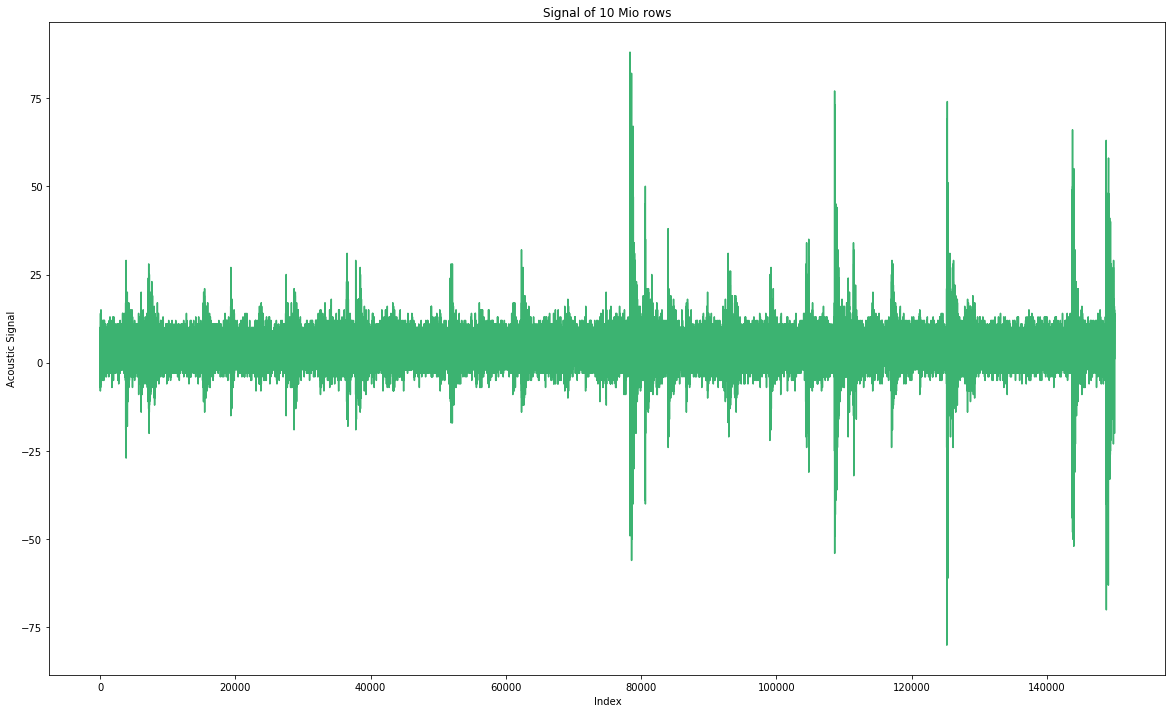

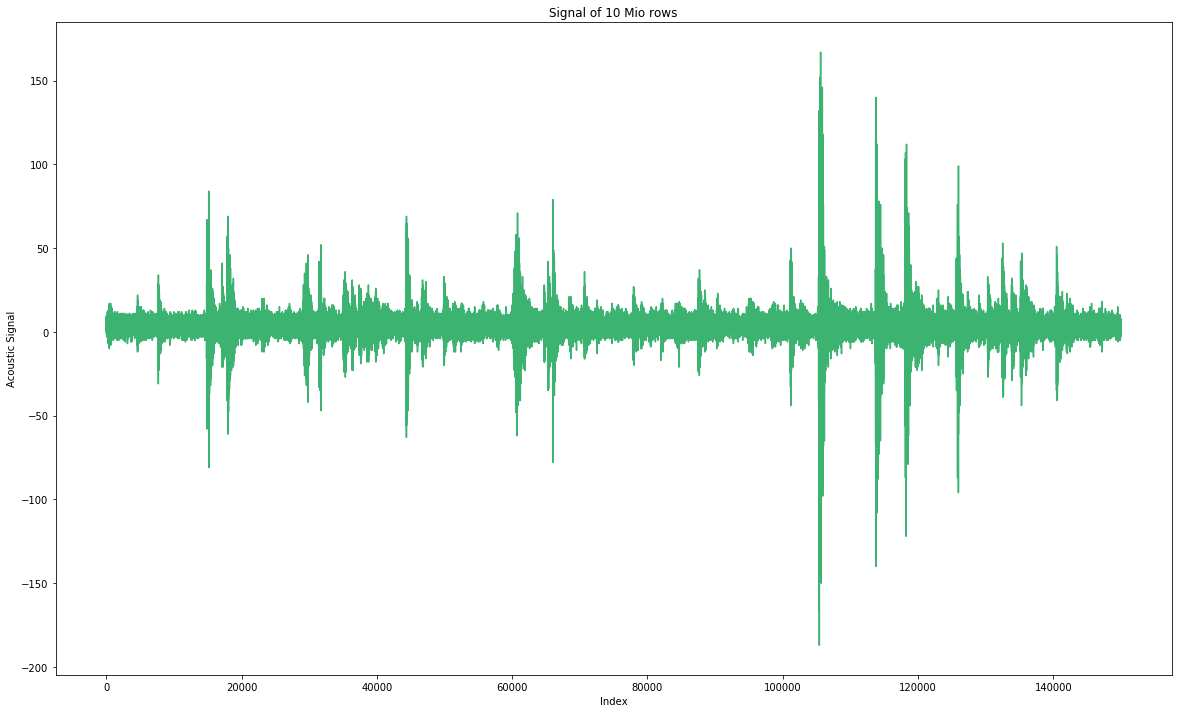

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(20,12))
plot_data_seg(test1)
fig, ax = plt.subplots(1, 1, figsize=(20,12))
plot_data_seg(test2)
fig, ax = plt.subplots(1, 1, figsize=(20,12))
plot_data_seg(test3)
fig, ax = plt.subplots(1, 1, figsize=(20,12))
plot_data_seg(test4)
fig, ax = plt.subplots(1, 1, figsize=(20,12))
plot_data_seg(test5)
fig, ax = plt.subplots(1, 1, figsize=(20,12))
plot_data_seg(test6)


For these segments they seemed to be a little bit different from train data.
The maximum only reaches less than 250. So not for sure if there is a experimental failure or not.
Is this for true for all test data?

In [29]:
test_segs = [pd.read_csv(os.path.join('test', filename), nrows=10000000, dtype={'acoustic_data': np.int16}) for filename in os.listdir('test')]

In [36]:
segs = [seg.max().acoustic_data for seg in test_segs]

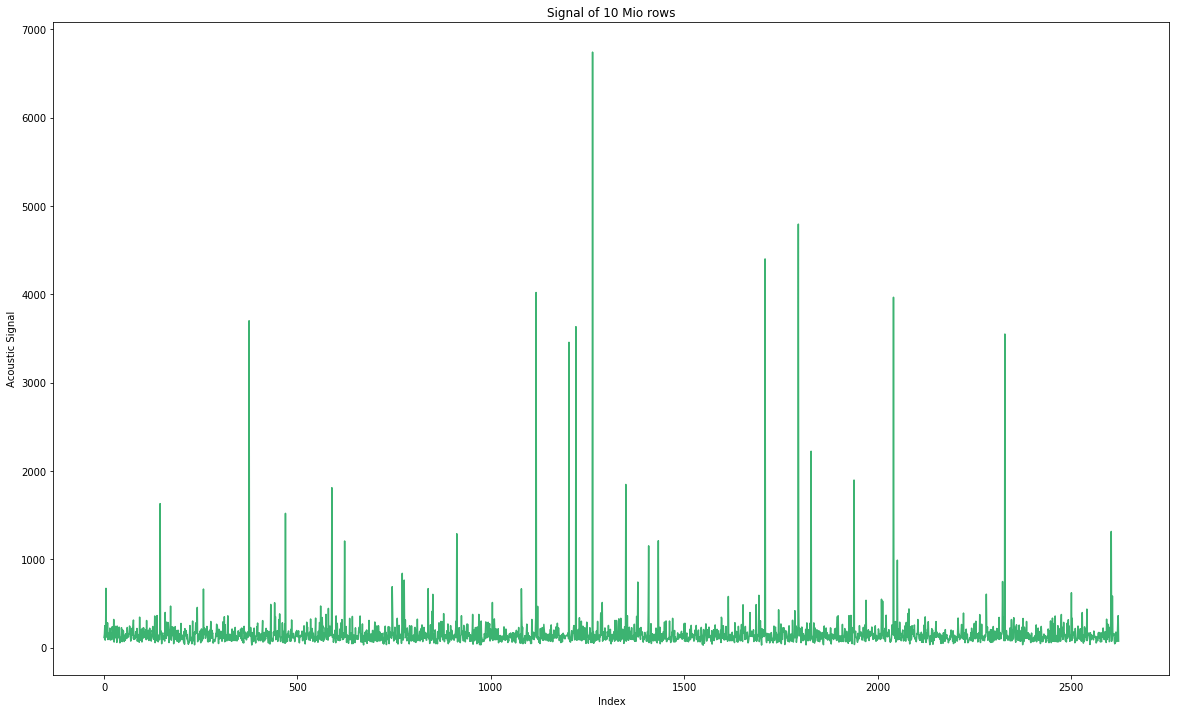

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(20,12))
ax.plot(range(len(segs)), segs, c="mediumseagreen")
ax.set_title("Signal of 10 Mio rows")
ax.set_xlabel("Index")
ax.set_ylabel("Acoustic Signal");

As we can see not every segmentation contains a peak over 1000, only around 20 segmentations have such peak.

### Now I have these questions & thoughts:
- 1, What does training data segmentation looks like without peak? Does it have the same feature with test data?
- 2, We already could experimental failure comes after acoustic peak, but what's the relationship none peak part to the failure time? When one experimental earth quake happened what contributes to the time interval the most? 
    - One explanation is the last failure just happend determinds the time interval to next one. Assume the earth quake only released part of the pressure, then how much it released - should be related to how long it takes before next one comes.
    - Another explanation is that some other factor contributes to the time interval, which will reflect in the segmentation acoustic_data without peak. If the acoustic_data couldn't give us the clue, then we cannot predict. But this problem should be predictable.